# Analysis for Soybean price data in MP from 2012 to 2024 (District-Level)

- Code for the paper: https://arxiv.org/abs/2503.11690

In [19]:
# Import necessary libraries for the analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from arch import arch_model

In [20]:
# Function to optimize EGARCH parameters
def optimize_egarch_parameters(data, p_range, o_range, q_range):
    best_aic = float('inf')
    best_params = None
    best_model = None

    for p in p_range:
        for o in o_range:
            for q in q_range:
                try:
                    model = arch_model(data, vol='EGARCH', p=p, o=o, q=q)
                    fit = model.fit(disp='off')
                    if fit.aic < best_aic:
                        best_aic = fit.aic
                        best_params = {'p': p, 'o': o, 'q': q}
                        best_model = fit
                except Exception as e:
                    print(f"Failed for p={p}, o={o}, q={q}: {e}")
                    continue

    return best_params, best_model

## Reading Price, Conditional Volatility and Meteorological Data

In [21]:
data = pd.read_csv("Price_Data\SOYBEAN-MODALPRICE-MONTHLY.csv")
data["Price Date"] = pd.to_datetime(data["Price Date"], format="%d-%m-%Y") 

cond_vol = pd.read_csv("data\Soybean-condvol-MP(state-level).csv")
cond_vol["Price Date"] = pd.to_datetime(cond_vol["Price Date"], format="%Y-%m-%d")

data.head()

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Abbin\AppData\Local\Temp\ipykernel_19668\362104393.py:1: SyntaxWarning: invalid escape sequence '\S'
  data = pd.read_csv("Price_Data\SOYBEAN-MODALPRICE-MONTHLY.csv")
C:\Users\Abbin\AppData\Local\Temp\ipykernel_19668\362104393.py:4: SyntaxWarning: invalid escape sequence '\S'
  cond_vol = pd.read_csv("data\Soybean-condvol-MP(state-level).csv")


,Price Date,Ashoknagar,Chhindwara,Dewas,Guna,Harda,Indore,Khandwa,Khargone,Mandsaur,Raisen,Rajgarh,Sagar,Sehore,Shajapur,Shivpuri,Tikamgarh,Ujjain,Vidisha
0,2012-01-01,2256.0,2247.5,2292.500000,2295.0,2121.666667,2324.666667,2285.000000,2315.0,2281.250000,2128.5,2317.250000,2221.75,2225.0,2345.600000,2280.0,2300.0,2351.5,2266.666667
1,2012-02-01,1175.0,2366.0,2446.000000,2453.0,2234.666667,2466.666667,2351.333333,2306.5,2300.000000,2150.0,2489.000000,2261.00,2352.0,2640.833333,2427.0,2405.0,2418.6,2408.333333
2,2012-03-01,2700.0,2705.0,2775.000000,2835.0,2552.333333,2832.500000,2658.500000,2700.0,2845.000000,2610.0,2720.000000,2725.00,2790.0,2070.000000,2800.0,2711.0,2850.0,2768.000000
3,2012-04-01,2995.0,3400.0,3278.333333,3328.0,3268.000000,3315.000000,3303.000000,3401.0,3400.000000,2585.0,3415.000000,3000.00,3450.0,2767.000000,3240.0,3325.0,3374.2,3263.250000
4,2012-05-01,3200.0,3014.0,3275.000000,3302.0,3140.500000,3282.500000,3100.000000,3195.5,3206.666667,3400.0,3163.333333,3200.00,3361.0,2661.666667,3363.0,3125.0,3185.0,3291.000000


In [22]:
prec_data = pd.read_csv("Met_Data\MP-Prec-Data.csv")
prec_data['Price Date'] = pd.to_datetime(prec_data['Price Date'], format="%d-%m-%Y")

prec_data.head()

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Abbin\AppData\Local\Temp\ipykernel_19668\3088109149.py:1: SyntaxWarning: invalid escape sequence '\M'
  prec_data = pd.read_csv("Met_Data\MP-Prec-Data.csv")


,Price Date,Ashoknagar,Chhindwara,Dewas,Guna,Harda,Indore,Khandwa,Khargone,Mandsaur,Raisen,Rajgarh,Sagar,Sehore,Shajapur,Shivpuri,Tikamgarh,Ujjain,Vidisha
0,2012-01-01,12.82,10.21,0.89,12.82,2.46,0.54,4.46,1.11,1.50,9.99,5.85,11.02,1.55,2.61,23.52,18.46,0.39,5.00
1,2012-02-01,0.00,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.36,0.11,0.00,0.00
2,2012-03-01,0.08,0.26,0.00,0.08,0.01,0.00,0.00,0.00,0.00,0.57,0.01,0.40,0.01,0.01,0.13,0.17,0.00,0.18
3,2012-04-01,5.81,1.64,2.25,5.81,1.97,1.23,1.51,1.37,12.21,2.58,6.29,3.83,2.69,4.04,6.41,5.76,2.07,3.53
4,2012-05-01,4.22,4.25,19.99,4.22,13.19,22.16,11.37,19.36,18.41,4.25,8.55,3.97,12.31,10.32,7.28,4.79,22.27,6.19


In [23]:
tmax_data = pd.read_csv("Met_Data\MP-Tmax-Data.csv")
tmax_data['Price Date'] = pd.to_datetime(tmax_data['Price Date'], format="%d-%m-%Y")

tmax_data.head()

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Abbin\AppData\Local\Temp\ipykernel_19668\2513022980.py:1: SyntaxWarning: invalid escape sequence '\M'
  tmax_data = pd.read_csv("Met_Data\MP-Tmax-Data.csv")


,Price Date,Ashoknagar,Chhindwara,Dewas,Guna,Harda,Indore,Khandwa,Khargone,Mandsaur,Raisen,Rajgarh,Sagar,Sehore,Shajapur,Shivpuri,Tikamgarh,Ujjain,Vidisha
0,2012-01-01,27.33,28.94,28.94,27.33,30.46,30.18,31.43,31.61,27.50,28.62,28.87,28.15,29.08,29.11,27.19,27.21,29.03,28.51
1,2012-02-01,34.69,35.27,35.72,34.69,37.00,36.55,36.78,37.56,33.33,35.55,36.00,35.12,36.15,36.11,34.17,35.28,35.01,35.48
2,2012-03-01,39.26,39.26,39.65,39.26,40.94,40.67,40.89,41.61,39.58,39.67,40.18,39.54,40.08,39.94,39.73,40.07,39.46,39.30
3,2012-04-01,41.57,41.39,42.05,41.57,43.35,42.36,43.12,43.19,41.26,42.30,42.32,42.37,42.40,42.13,42.87,43.04,41.64,41.82
4,2012-05-01,45.05,43.57,43.99,45.05,45.94,43.93,45.46,44.68,44.40,45.26,45.57,45.37,45.04,45.02,46.46,46.24,42.99,44.71


## Exploratory Data Analysis and Visualization

In [24]:
df_logreturns = pd.DataFrame()
df_logreturns["Price Date"] = data["Price Date"]

# Log Returns of modal price for each district
for district in data.columns[1:]:
    df_logreturns[district] = np.log(data[district]) - np.log(data[district].shift(1))

df_logreturns = df_logreturns.dropna()
df_logreturns.head()

,Price Date,Ashoknagar,Chhindwara,Dewas,Guna,Harda,Indore,Khandwa,Khargone,Mandsaur,Raisen,Rajgarh,Sagar,Sehore,Shajapur,Shivpuri,Tikamgarh,Ujjain,Vidisha
1,2012-02-01,-0.652325,0.051382,0.064811,0.066579,0.051890,0.059291,0.028617,-0.003678,0.008186,0.010050,0.071500,0.017512,0.055509,0.118553,0.062480,0.044641,0.028135,0.060625
2,2012-03-01,0.831984,0.133901,0.126197,0.144730,0.132916,0.138292,0.122780,0.157521,0.212654,0.193882,0.088751,0.186661,0.170776,-0.243546,0.142963,0.119768,0.164130,0.139190
3,2012-04-01,0.103692,0.228674,0.166684,0.160330,0.247170,0.157298,0.217069,0.230818,0.178212,-0.009625,0.227546,0.096144,0.212333,0.290215,0.145954,0.204152,0.168839,0.164599
4,2012-05-01,0.066207,-0.120507,-0.001017,-0.007843,-0.039796,-0.009852,-0.063429,-0.062326,-0.058543,0.274050,-0.076551,0.064539,-0.026136,-0.038811,0.037260,-0.062035,-0.057706,0.008468
5,2012-06-01,-0.323021,0.188716,0.088696,0.056877,0.141171,0.086757,0.190887,0.076920,0.092755,0.031342,0.139327,0.036513,0.096202,0.282264,0.085313,0.113329,0.163903,0.078681


In [25]:
df_condvol = pd.DataFrame()
df_condvol["Price Date"] = data["Price Date"]

optimized_params = {}

# Optimize EGARCH parameters and fit the model for each district
for district in df_logreturns.columns[1:]:
    print(f"Optimizing EGARCH and fitting for {district}...")
    params, _ = optimize_egarch_parameters(df_logreturns[district], p_range=range(1, 5), o_range=range(0, 2), q_range=range(1, 5))
    model = arch_model(df_logreturns[district], vol='EGARCH', p=params['p'], o=params['o'], q=params['q'])
    fit = model.fit(disp='off')
    df_condvol[district] = fit.conditional_volatility

df_condvol = df_condvol.dropna(axis=0)
df_condvol.head()

c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.02604. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.02604. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData

Optimizing EGARCH and fitting for Ashoknagar...


c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.02604. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.02604. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData

Optimizing EGARCH and fitting for Chhindwara...


c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01259. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01259. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData

Optimizing EGARCH and fitting for Dewas...


c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.009449. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.009449. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppDa

Optimizing EGARCH and fitting for Guna...


c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03656. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03656. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData

Optimizing EGARCH and fitting for Harda...


c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01144. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01144. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData

Optimizing EGARCH and fitting for Indore...


c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03157. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03157. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData

Optimizing EGARCH and fitting for Khandwa...


c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01207. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01207. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData

Optimizing EGARCH and fitting for Khargone...


c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01321. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01321. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData

Optimizing EGARCH and fitting for Mandsaur...


c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01466. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01466. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData

Optimizing EGARCH and fitting for Raisen...


c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.02234. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.02234. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData

Optimizing EGARCH and fitting for Rajgarh...


c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01046. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01046. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData

Optimizing EGARCH and fitting for Sagar...


c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.008996. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.008996. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppDa

Optimizing EGARCH and fitting for Sehore...


c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0144. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0144. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData\L

Optimizing EGARCH and fitting for Shajapur...


c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03095. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03095. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData

Optimizing EGARCH and fitting for Shivpuri...


c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.06608. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.06608. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData

Optimizing EGARCH and fitting for Tikamgarh...


c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01188. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01188. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData

Optimizing EGARCH and fitting for Ujjain...


c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01135. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01135. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData

Optimizing EGARCH and fitting for Vidisha...


c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01316. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01316. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Abbin\AppData

,Price Date,Ashoknagar,Chhindwara,Dewas,Guna,Harda,Indore,Khandwa,Khargone,Mandsaur,Raisen,Rajgarh,Sagar,Sehore,Shajapur,Shivpuri,Tikamgarh,Ujjain,Vidisha
1,2012-02-01,0.325623,0.141632,0.106154,0.164186,0.130569,0.113152,0.148654,0.127649,0.136471,0.115443,0.111454,0.104011,0.102066,0.266077,0.175307,0.111194,0.114057,0.111450
2,2012-03-01,0.359948,0.138240,0.108481,0.142983,0.123052,0.108773,0.137382,0.112394,0.109952,0.077242,0.111658,0.111842,0.080866,0.237832,0.128331,0.096008,0.106176,0.104553
3,2012-04-01,0.440941,0.157476,0.114096,0.153335,0.155304,0.118815,0.146362,0.099803,0.228285,0.256040,0.112021,0.094876,0.116618,0.292567,0.115895,0.149479,0.114989,0.134737
4,2012-05-01,0.297353,0.144341,0.112888,0.105295,0.159206,0.165441,0.201709,0.177485,0.234351,0.112491,0.158237,0.158225,0.068606,0.242982,0.153852,0.148228,0.188315,0.124170
5,2012-06-01,0.195789,0.148121,0.106797,0.113113,0.131670,0.135691,0.177089,0.292980,0.150277,0.100703,0.163102,0.141979,0.105979,0.163391,0.168080,0.147615,0.150841,0.104341


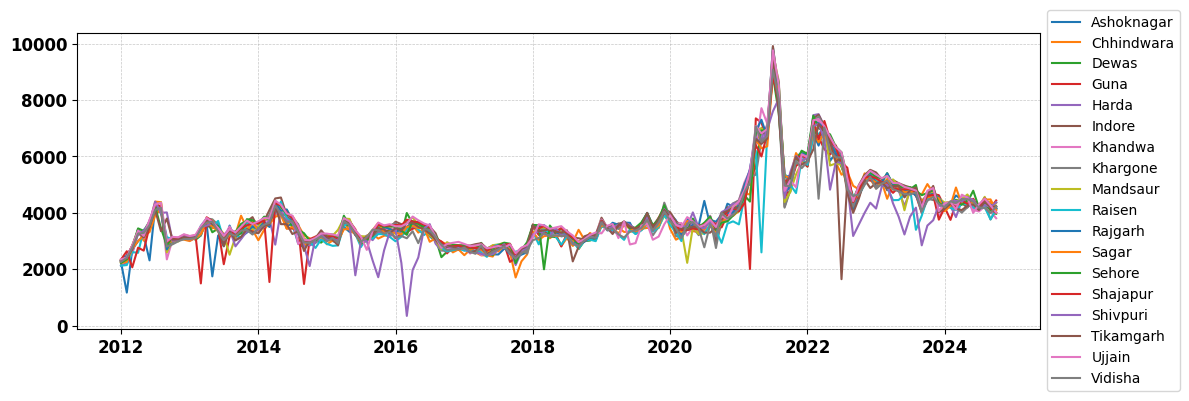

In [26]:
# Plotting the modal prices for each district

plt.figure(figsize=(12, 4))

for district in data.columns[1:]:
    plt.plot(data["Price Date"], data[district], label=district, linewidth = 1.5)

plt.xticks(rotation=0, fontsize=12, fontweight='bold')
plt.yticks(rotation=0, fontsize=12, fontweight='bold')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1.1))
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

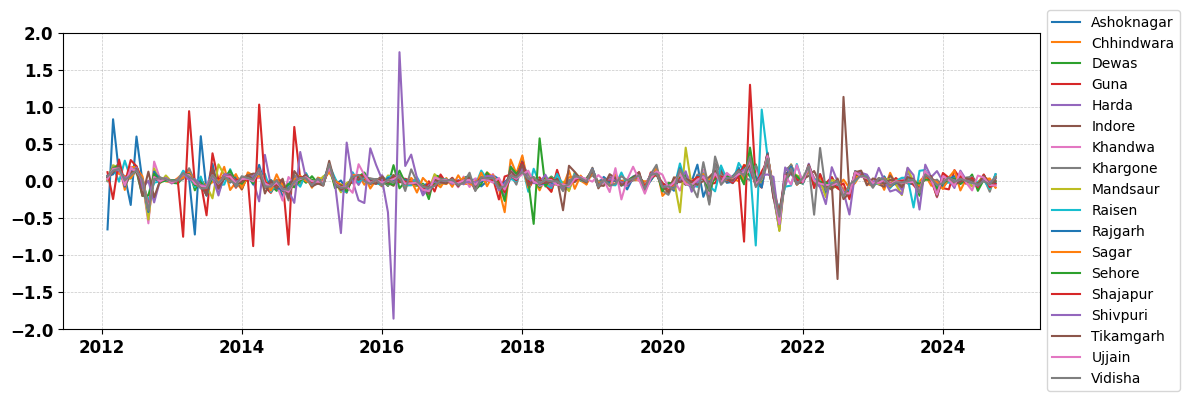

In [27]:
# Plotting the log returns for each district

plt.figure(figsize=(12, 4))

for district in df_logreturns.columns[1:]:
    plt.plot(df_logreturns["Price Date"], df_logreturns[district], label=district, linewidth = 1.5)

plt.xticks(rotation=0, fontsize=12, fontweight='bold')
plt.yticks(rotation=0, fontsize=12, fontweight='bold')
plt.ylim(-2, 2)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1.1))
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

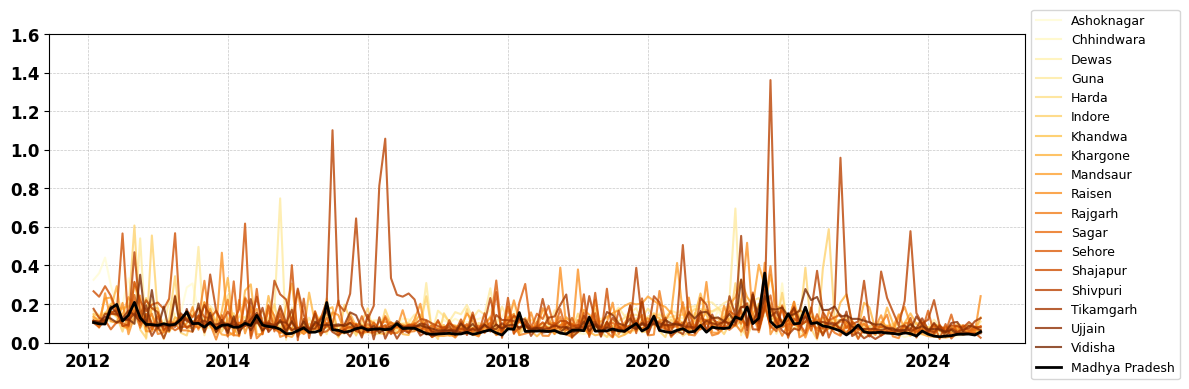

In [28]:
# Plotting the conditional volatilities for each district and Madhya Pradesh state-level

palette = sns.color_palette("YlOrBr", n_colors=18)

plt.figure(figsize=(12, 4))

for idx, district in enumerate(df_condvol.columns[1:]):
    plt.plot(df_condvol["Price Date"], df_condvol[district], label=district, linewidth=1.5, color=palette[idx], alpha=0.8)

plt.plot(cond_vol["Price Date"], cond_vol["cond_vol"], label="Madhya Pradesh", linewidth=2, color="black")
plt.xticks(rotation=0, fontsize=12, fontweight='bold')
plt.yticks(rotation=0, fontsize=12, fontweight='bold')
plt.ylim(0, 1.6)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1.1), fontsize=9)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.savefig("images/Soybean-condvol-MP-districtwise.png", dpi=600, bbox_inches='tight')
plt.show()